# The Central limit theorem

### Preliminaries

The central limit theorem is possibly the most famous theorem in all of statistics, being widely used in any field that wants to infer something or make predictions from gathered data. A first (simple) version of it was introduced in the eighteenth century, first by de Moivre and then later in a more refined way by Laplace, but it wasn't until around 1935 that the theorem as we know it today was published.  The goal of these notes is to explain in broad terms what it says and, more importantly, what it *doesn't*.

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import seaborn as sns

Informally, the theorem states that if we take random samples of a certain distribution and then average them, the result (i.e the *sample mean*) will resemble a normal distribution the more samples we take. More precisely, if $\{X_1,\dots,X_n,\dots\}$ are independent and identically distributed (i.i.d) random variables and $\overline{X_n} = \dfrac{X_1+\dots+X_n}{n}$ is the sample mean, its normalization $\dfrac{\overline{X_n} - E(\overline{X_n})}{\sqrt{Var(\overline{X_n})}}$ converges (in distribution) to a standard normal distribution $N(0,1)$. Another way of saying this is that, as $n$ gets bigger, the "difference" between the distribution of $\overline{X_n}$ and a normal $N(E(\overline{X_n}),Var(\overline{X_n}))$ goes to zero. Note that because the variables are i.i.d, $E(\overline{X_n})$ is the same as the expectation of any $X_i$, and $Var(\overline{X_n})$ the same as $\frac{Var(X_i)}{n}$. By a simple calculation one can check that the theorem holds just the same if we replace every instance of $\overline{X_n}$ with the sums $S_n = X_1 + \dots + X_n$.

The most common example of the CLT in action is when considering a binomial distribution. Say we flip a coin $n$ number of times and we count the number of heads obtained; we can think of this as the sum of $n$ independent random variables $X_i$ with a Bernoulli distribution, $X_i \sim Be(1/2)$ (assuming the coin is fair). Then the CLT tells us that as $n$ gets big, we can approximate the number of heads $S_n = X_1 + \dots + X_n$ by a normal distribution with mean $n/2$ and standard deviation $\sqrt{n/4}$. Let's see this in a simulation.

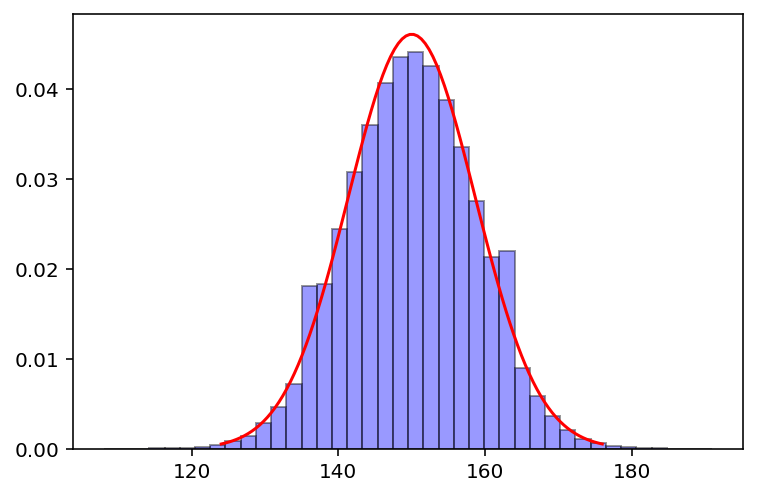

In [31]:
iterations = 200000
samples = 300
result = np.empty(iterations)
result_normalized = np.empty(iterations)
for i in range(iterations):
    result[i] = (np.random.binomial(samples,0.5))

mu = samples/2
variance = samples/4
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma),color='red');

sns.distplot(result, hist=True, kde=False, 
             bins=40, color = 'blue',
             hist_kws={'edgecolor':'black'},norm_hist=True);

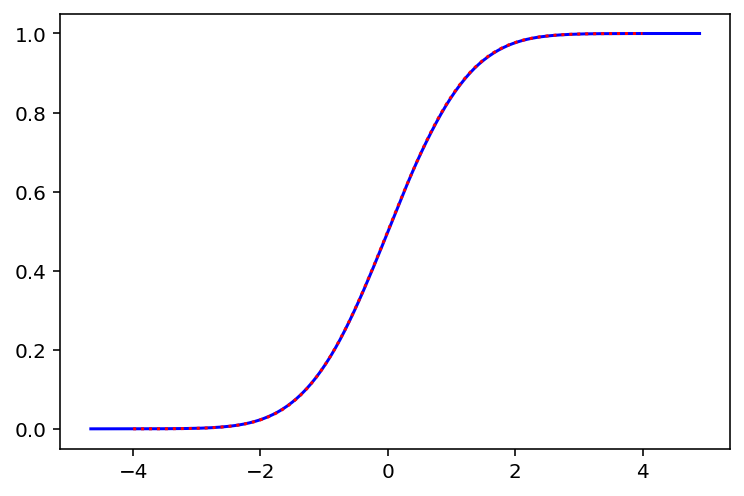

In [14]:
result_normalized = ((result-samples/2)/(math.sqrt(samples/4)))
sns.distplot(result_normalized,
             hist_kws=None,
             kde_kws=dict(cumulative=True),
             hist=False,
            color='blue');
y=np.linspace(-4,4,100)           
plt.plot(y,stats.norm.cdf(y,0,1),':',color='red');

We carry out a simulation of the example discussed above taking $n=300$. In the first figure, in blue is the normalized histogram counting the frequency of the number of heads obtained after $300$ tosses; in red is the probability density function (pdf) of a normal distribution $N(150,75)$. The second figure shows a plot of the empirical cumulative distribution function (ecdf) of the normalized number of heads in blue and the cumulative distribution function (cdf) of a $N(0,1)$ random variable in dotted red. In general, comparing cdfs is more accurate since histograms can differ wildly depending on the number of bins, and the convergence of the CLT is stated in terms of the cdfs.

Note that in this particular case the CLT is telling us that, for any $0<p<1$, a random variable $X$ with a binomial distribution $X \sim Bi(n,p)$ can be approximated by a normal distribution $N(np,np(1-p))$ provided $n$ is big enough. Do not be misled into thinking that any distribution can be approximated by a normal one, this is NOT what the theorem states. What it says is that the **sample means** (or **sums**) of a (reasonable) distribution will be close to a normal one. It just so happens that the sum of independent Bernoulli random variables yields a binomial distribution.

### The three coins (non) example

Let's consider the following scenario: say we have three coins with different *biases* (their probability of coming up heads): $0,4$, $0,5$ and $0,6$. We pick one of the three coins at random, toss it $300$ times and count the number of heads. What is the distribution obtained? Is it approximately normal?. As we have seen, if we fix the coin we're tossing, the number of heads can effectively be approximated by a distribution $N(300p,300p(1-p))$ (where $p$ is the coin's bias). This time, however, each time we take a sample we might be tossing any of the three different coins. A first idea might be that this should be a sort of average of the three coins concentrated around $150$, resembling a normal distribution. Let's see this in a simulation.

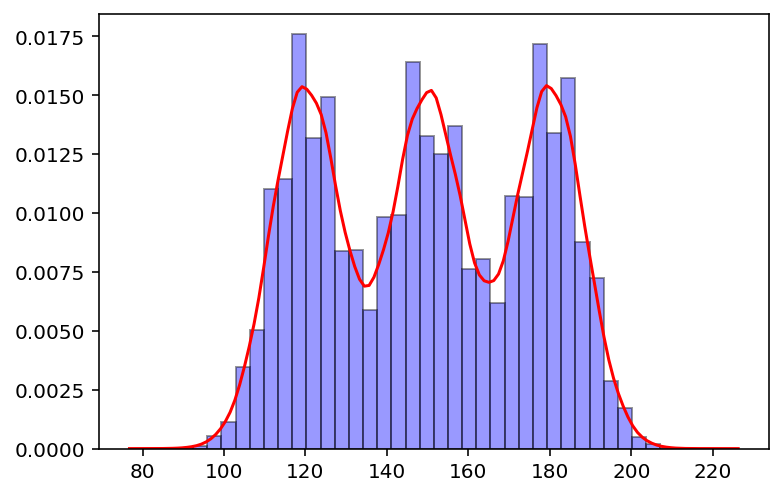

In [3]:
#Distribution of picking one of the three coins at random and tossing it 300 times.
samples = 1000000
a = np.random.uniform(0,1,samples)
result = np.empty(len(a))
for i in range(a.size):
    if a[i]<1/3:
        result[i] = (np.random.binomial(300,0.4))
    elif a[i]<2/3:
        result[i] = (np.random.binomial(300,0.5))
    else:
        result[i] = (np.random.binomial(300,0.6))

sns.distplot(result, hist=True, kde=True, 
             bins=40, color = 'blue',
             hist_kws={'edgecolor':'black'},norm_hist=True,
             kde_kws=dict(color='red'));

In blue is a histogram counting the frequency of the number of heads obtained. In red is the plot of a *Kernel density estimation* for this distribution, an estimate for its pdf if the variable were continuous. As the figure shows, this distribution has three peaks around the means of the three coins ($120$, $150$ and $180$) and cannot be approximated by a normal distribution. Remember, the CLT states that the *averages* or *sums* of i.i.d random variables will resemble a normal distribution. In the case where we're always flipping the same coin, these are the sums of the Bernoulli variables adding $1$ with probability $p$ and $0$ otherwise. But in this case, depending on which coin we choose, the random variables we're summing will be different, so the variable that counts the number of heads in this experiment as a whole can't really be written as a sum in the same way as before. Writing it as a certain sum of random variables might be possible, but it will require dependency between them, and the validity of the CLT when we introduce dependence is much more restricted.

### Speed of convergence and fat tails

A question to answer regarding the CLT is how big we need $n$ to be. It is important to understand that, mathematically, all the theorem is saying is that *eventually* (i.e for $n$ big enough) the distribution of the sample means will be close to normal. In practice, 'eventually' could mean an egregiously large $n$, one greater than the number of samples we can possibly hope to take, which would render the CLT useless. To address this possible issue, one usually studies the *speed of convergence* of the sample means, that is, one gives an upper bound on the error incurred when replacing the sample means with a normal distribution. The **Berry-Esseen theorem** is a well known result in this direction, which under certain conditions (namely, finiteness of the third moment) tells us that the error is in the order of $\frac{1}{\sqrt{n}}$. 

Let's take a look at some examples on the speed of convergence. For this we are going to use the *Kolmogorov-Smirnov* test to measure how close the sample means are to a normal distribution in different cases. For our purposes, we don't need to know exactly how the test is calculated, just that it gives a $p$-value ranging from $0$ to $1$, with values close to $1$ meaning that we can't be too sure that the distributions are different and close to $0$ being very confident they are. Other tests exist for this purpose, namely the Anderson-Darling and Cramér-von Mises tests, each with their pros and cons, but for our needs one will suffice (one can check that the Anderson-Darling test, implemented in scipy, throws similar results as the ones we'll get).

KstestResult(statistic=0.009223288245315209, pvalue=0.3626480209419946)


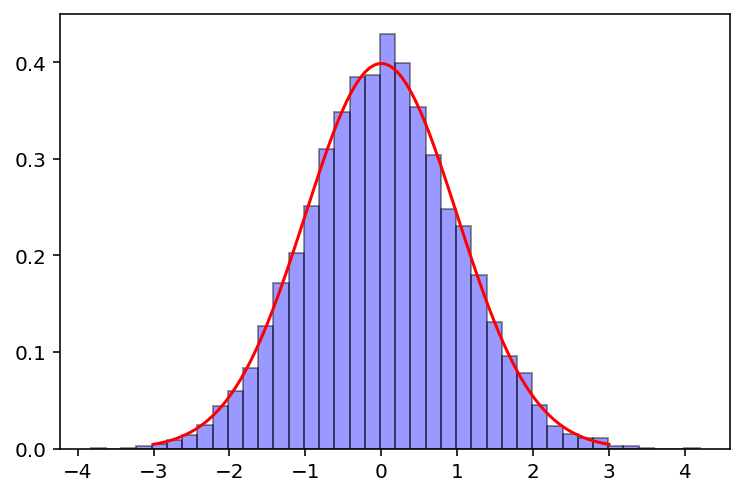

In [21]:
#Calculation of the K-S test for the (normalized) sample mean of a uniform distribution with n=300.
iterations = 10000
result = np.empty(iterations)
samples = 300
for i in range(iterations):
    a = np.random.uniform(0,1,samples)
    result[i] = ((math.sqrt(samples) * (np.mean(a) - 0.5))/(math.sqrt((1/12))))
    
x = np.linspace(-3, 3, 100)
plt.plot(x, stats.norm.pdf(x, 0, 1),color='red');

sns.distplot(result, hist=True, kde=False, 
             bins=40, color = 'blue',
             hist_kws={'edgecolor':'black'},norm_hist=True);

print(stats.kstest(result,'norm'))

KstestResult(statistic=0.03895284621420769, pvalue=1.3234855514865805e-13)


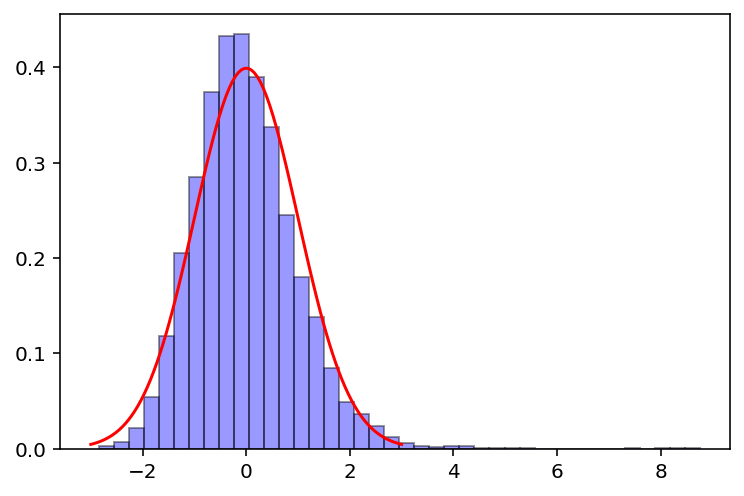

In [22]:
#Calculation of the K-S test for the sample mean of a pareto type II distribution (sometimes referred to
#as Lomax) with parameters alpha=3 and lambda=1, n=300.
iterations = 10000
result = np.empty(iterations)
samples = 300
for i in range(iterations):
    a = np.random.pareto(3,samples)
    result[i] = ((math.sqrt(samples) * (np.mean(a)-(1/2)))/(math.sqrt(0.75)))
    
x = np.linspace(-3, 3, 100)
plt.plot(x, stats.norm.pdf(x, 0, 1),color='red');

sns.distplot(result, hist=True, kde=False, 
             bins=40, color = 'blue',
             hist_kws={'edgecolor':'black'},norm_hist=True);

print(stats.kstest(result,'norm'))

KstestResult(statistic=0.012362979296842935, pvalue=0.09406003585729698)


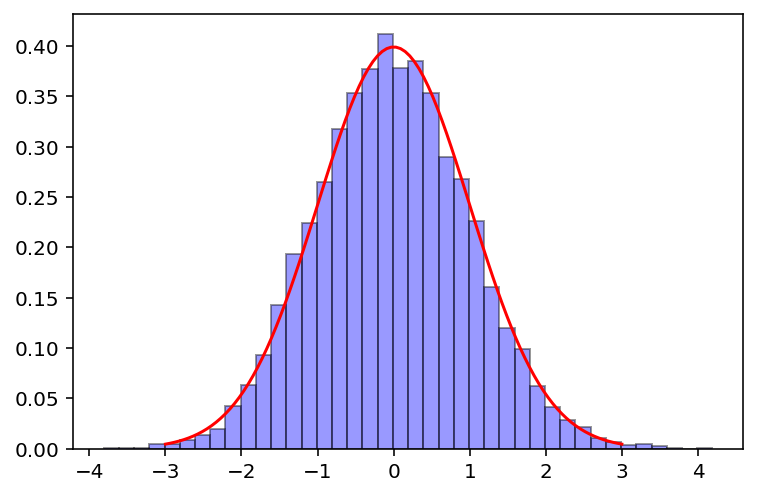

In [24]:
#Calculation of the K-S test as before but with n=30000.
iterations = 10000
result = np.empty(iterations)
samples = 30000
for i in range(iterations):
    a = np.random.pareto(3,samples)
    result[i] = ((math.sqrt(samples) * (np.mean(a)-(1/2)))/(math.sqrt(0.75)))

x = np.linspace(-3, 3, 100)
plt.plot(x, stats.norm.pdf(x, 0, 1),color='red');

sns.distplot(result, hist=True, kde=False, 
             bins=40, color = 'blue',
             hist_kws={'edgecolor':'black'},norm_hist=True);

print(stats.kstest(result,'norm'))

Notice how, when taking a sample size of $300$, the uniform distribution gives a much higher $p$-value every time. On the other hand, when increasing the size to $30000$, the pareto distribution throws $p$-values more comparable to those of the uniform. Note also that in the case of the pareto distributions the plots are shifted to the left and there seems to be some empty space to the right. What's happening is there are actual values to the right, they're just not very frequent; this is because this distribution is fairly *fat-tailed*, that is, the probability of getting extreme values (i.e values that deviate heavily from the mean) is much larger than on a typical distribution, so it takes more samples to balance those out when taking the average.

On this note, if a distribution is too fat-tailed, the CLT fails, which is to say, the sample means will not eventually follow a normal distribution. More concretely, this will happen if the distribution in question has infinite variance; intuitively, this is because the variations are so wild that no amount of samples will make the averages stabilize around a certain value. This might seem like a fringe case, but in certain disciplines where some variables are too volatile (like finance), it's not completely unreasonable to expect infinite variance. Even if one expects finite variance, its value might be so large that the number of samples required to get a reasonable estimation through the CLT is not feasible.

As a quick visualization of fat-tailedness, consider the following simulation where we take a million samples of different Pareto distributions and compute their maximum value attained and probability of being greater than $100$, as well as plot their pdfs.

Pareto 3 max: 357.6192285807917
Pareto 3 probability of > 100: 9.705901479195589e-07
Pareto 2 max: 2000.4826346631796
Pareto 2 probability of > 100: 9.80296049406526e-05
Pareto 1 max: 45451896.039782874
Pareto 1 probability of > 100: 0.00990099009900991


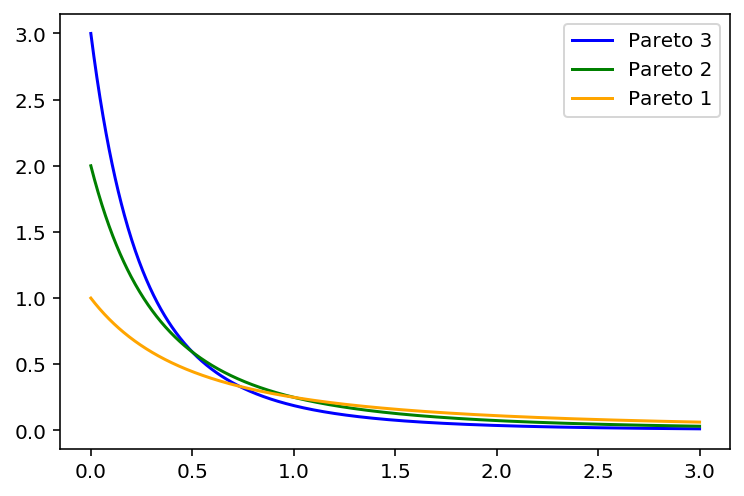

In [27]:
#Pareto distribution (type II) pdf plots with parameters lambda=1, alpha=3,2,1.
x=np.linspace(0,3,1000)
plt.plot(x,stats.lomax.pdf(x,3),color='blue', label='Pareto 3')
plt.plot(x,stats.lomax.pdf(x,2),color='green', label='Pareto 2')
plt.plot(x,stats.lomax.pdf(x,1),color='orange', label='Pareto 1')
plt.legend(loc='upper right')

samples = 1000000
for i in [3,2,1]:
    result = np.random.pareto(i,samples)
    print("Pareto", i, "max:", np.max(result))
    print("Pareto", i, "probability of > 100:", 1 - stats.lomax.cdf(100,i))

We can see that the maximum values of the (type II) pareto distributions (and probabilities of being $>100$) increase as the parameter $\alpha$ decreases. In other words, extreme values become more likely, which can be seen in their pdfs decaying more slowly. This is what is meant by fat-tailedness, their pdf plots have fat tails. As a side note, the distribution with $\alpha=3$ has finite variance, while the other two do not. 

The idea of estimating the probability of high deviations from the mean is encompassed in results like Chebyshev's inequality. These usually give upper bounds on the probability $P(|X - \mu|>\varepsilon)$ for a random variable $X$, $\mu$ its mean and arbitrary $\varepsilon$ (a refined version is the Vysochanskij–Petunin inequality, giving a more optimal bound on unimodal distributions). Note, however, that these typically require finite variance and thus are not suited for very fat-tailed distributions like the Pareto $1$ and $2$ we just saw (in fact, the Pareto $1$ doesn't even have a mean). Tail behaviour in these types of distributions might require a more case by case approach.

### Common misconceptions and final comments

Part of the reason why the normal distribution is so popular is because it is somewhat well behaved. It is symmetric around the mean (which is also its mode) and stable, meaning that linear combinations of normally distributed random variables are again normally distributed. Also, at the time when the CLT was first introduced there were no computers, so calculations were very inefficient and restricted; because the values of a normal distribution were tabulated, having normally distributed data was very convenient. This led to it being ubiquitous, and even today most introductory probability and statistics courses spend most of their time covering the normal distribution.

When discussing the CLT at the beginning, we warned about the mistake of approximating any distribution by a normal one. This is a very common misconception, that if we take enough samples the distribution of whatever it is we're studying will be (close to) normal. The amount of time between earthquakes is usually modeled by an exponential distribution. If we were to measure these times and then plot the distribution obtained, the result will resemble an exponential distribution, *not* a normal one, the more measurements we make (a measurement here is the same as a sample). The distribution of the **average** time between earthquakes, however, will be approximately normal as the sample size increases. This is an important distinction. The CLT is widely used because taking averages is a very common way to study properties of nature or a population. For instance, if one is interested in the proportion of individuals in a population satisfying a certain condition (like having some disease or voting for a certain candidate), one can think of this as a variable taking the value $1$ if the condition is satisfied and $0$ if it's not. The sample means are then the proportion we are looking for, so it is reasonable to model it through a normal distribution with enough samples (usually around $30$). Just remember, not *everything* we study is an average.

Another frequent misconception is that the sample means are *actually* normally distributed after taking enough samples. The normality assumption seen throughout science is just an approximation, the only way the sample means will be normally distributed is if the random variable being sampled was already normal to begin with. This approximation is useful because it simplifies things, but it is still important to be mindful that it is not completely accurate. 

Finally, a common indicator that a normality assumption might be incorrect is the presence of extreme outliers. We've seen how fat-tailedness is related to outliers being more likely, but in a standard normal distribution, an absolute value of, say, more than $6$ is incredibly rare (approximately $1$ in $500.000.000$). Seeing an event like this isn't impossible, but it is so unlikely that it can make you reconsider whether your model fits. Through Bayes' theorem one can try to answer the question of how reasonable the normality assumption is after seeing such an event (see for example https://www.johndcook.com/blog/2018/05/31/six-sigma-events/ for a good explanation of this). This idea of updating your beliefs after an outcome is at the core of bayesian statistics and can be a powerful tool in modeling, one that isn't as reliant in prior assumptions.